In [2]:
import pandas as pd
import keras
from keras.applications import VGG16
import tensorflow

In [8]:
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [9]:
vgg16.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

In [11]:
os.listdir(r"C:\Users\ASUS\Downloads\archive (24)\dataset")

['Beagle',
 'Boxer',
 'Bulldog',
 'Dachshund',
 'German_Shepherd',
 'Golden_Retriever',
 'Labrador_Retriever',
 'Poodle',
 'Rottweiler',
 'Yorkshire_Terrier']

In [12]:
import os
import cv2
import numpy as np

image = []
class_label = []

dataset_path = r"C:\Users\ASUS\Downloads\archive (24)\dataset"

for folder_name in os.listdir(dataset_path):
    folder_path = os.path.join(dataset_path, folder_name)
    if os.path.isdir(folder_path):  # Check if it's a directory
        for file_name in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file_name)
            if os.path.isfile(file_path):  # Check if it's a file
                img = cv2.imread(file_path)  # Read the image into a temporary variable
                resized_img = cv2.resize(img, (224, 224))  # Resize the image
                image.append(resized_img)  # Append the resized image to the list
                class_label.append(folder_name)  # Append the folder name to the class_label list



In [13]:
image[0].shape

(224, 224, 3)

In [14]:
vgg16.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
from keras.layers import Flatten
from keras.models import Model

In [16]:
x=vgg16.output
x=Flatten()(x)
Model=Model(inputs=vgg16.input,outputs=x)

In [17]:
Model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
Model.compile(optimizer="Adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [19]:
image_data=np.asarray(image)

In [22]:
img1=cv2.imread(r"C:\Users\ASUS\Downloads\golden_retriever.jpeg")

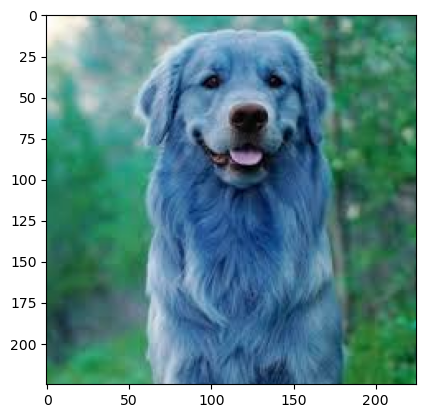

In [23]:
plt.imshow(img1,cmap='gray')

In [24]:
img2 = cv2.resize(img1,(224,224))

In [25]:
img2.shape

(224, 224, 3)

In [49]:
np.argmax(Model.predict(img2[np.newaxis]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 500ms/step


4959

In [63]:
#image_array = np.array(img2)

# Ensure the array has the correct shape
#print("Shape of image array:", image_array.shape)

# Predict using the model
predictions = Model.predict(img2[np.newaxis])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 801ms/step


In [64]:
type(predictions)

numpy.ndarray

In [66]:
mod.predict(predictions)[0]

'Golden_Retriever'

In [30]:
predictions.shape

(1, 25088)

In [37]:
image_array = np.array(image)

# Ensure the array has the correct shape
print("Shape of image array:", image_array.shape)

# Predict using the model
predictions = Model.predict(image_array)

Shape of image array: (967, 224, 224, 3)
31/31 ━━━━━━━━━━━━━━━━━━━━ 257s 7s/step


In [28]:
predictions.shape

(967, 25088)

In [38]:
features=pd.DataFrame(predictions)

In [39]:
features["label"]=class_label

In [40]:
features

,0,1,2,3,4,5,6,7,8,9,...,25079,25080,25081,25082,25083,25084,25085,25086,25087,label
0,0.000000,0.0,0.0,0.000000,0.27490,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,Beagle
1,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,Beagle
2,10.925894,0.0,0.0,0.000000,0.00000,0.0,1.437937,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,Beagle
3,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.0,...,0.0,12.244352,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,Beagle
4,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.234405,0.0,9.582954,0.000000,0.0,0.0,4.881645,0.000000,Beagle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962,0.000000,0.0,0.0,54.577351,0.00000,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,Yorkshire_Terrier
963,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,Yorkshire_Terrier
964,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.000000,4.452814,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,Yorkshire_Terrier
965,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.0,3.593518,0.000000,0.0,0.0,0.860156,4.574791,Yorkshire_Terrier


In [18]:
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score,f1_score
import pandas as pd
import time

In [19]:
cv=features["label"]
fv=features.drop("label",axis=1)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(fv, cv, test_size=0.2, random_state=10)

In [21]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((773, 25088), (194, 25088), (773,), (194,))

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

# Define the pipelines without a preprocessor
pipelines_classification = {
    'logistic_regression': Pipeline([
        ('classifier', LogisticRegression())
    ]),
    'sgd_classifier': Pipeline([
        ('classifier', SGDClassifier())
    ]),
    'decision_tree_classifier': Pipeline([
        ('classifier', DecisionTreeClassifier())
    ]),
    'knn_classifier': Pipeline([
        ('classifier', KNeighborsClassifier())
    ]),
    'svc': Pipeline([
        ('classifier', SVC())
    ]),
    'random_forest_classifier': Pipeline([
        ('classifier', RandomForestClassifier())
    ])
}

# Define the parameter grids without referencing the preprocessor
param_grids_classification = {
    'logistic_regression': [
        {
            'classifier__C': [0.1, 1, 10]
        }
    ],
    'sgd_classifier': [
        {
            'classifier__alpha': [0.0001, 0.001, 0.01],
            'classifier__penalty': ['l2', 'l1', 'elasticnet']
        }
    ],
    'decision_tree_classifier': [
        {
            'classifier__max_depth': [None, 5, 10]
        }
    ],
    'knn_classifier': [
        {
            'classifier__n_neighbors': [i for i in range(1, 30, 2)],
            'classifier__weights': ['uniform', 'distance']
        }
    ],
    'svc': [
        {
            'classifier__C': [0.1, 1, 10],
            'classifier__kernel': ['linear', 'rbf', 'poly']
        }
    ],
    'random_forest_classifier': [
        {
            'classifier__n_estimators': [50, 100, 200],
            'classifier__max_depth': [None, 5, 10],
            'classifier__min_samples_split': [2, 5, 10],
            'classifier__min_samples_leaf': [1, 2, 4]
        }
    ]
}

best_models_classification = {}

for algorithm in pipelines_classification.keys():    
    grid_search = GridSearchCV(estimator=pipelines_classification[algorithm], 
                               param_grid=param_grids_classification[algorithm], 
                               cv=5, 
                               scoring='f1_micro',  # Correct scoring metric for f1_micro
                               return_train_score=True,
                               verbose=1)
    
    grid_search.fit(X_train, y_train)
    best_models_classification[algorithm] = grid_search.best_estimator_
    
    y_pred_test = grid_search.predict(X_test)
    print('F1 Score on Test Data for', algorithm, ':', f1_score(y_test, y_pred_test, average='micro'))
    
    # Print best parameters
    print("Best Parameters for", algorithm, ":", grid_search.best_params_)
    print("*" * 100)


Fitting 5 folds for each of 3 candidates, totalling 15 fits
F1 Score on Test Data for logistic_regression : 0.979381443298969
Best Parameters for logistic_regression : {'classifier__C': 0.1}
****************************************************************************************************
Fitting 5 folds for each of 9 candidates, totalling 45 fits
F1 Score on Test Data for sgd_classifier : 0.9845360824742269
Best Parameters for sgd_classifier : {'classifier__alpha': 0.0001, 'classifier__penalty': 'l2'}
****************************************************************************************************
Fitting 5 folds for each of 3 candidates, totalling 15 fits
F1 Score on Test Data for decision_tree_classifier : 0.9845360824742269
Best Parameters for decision_tree_classifier : {'classifier__max_depth': None}
****************************************************************************************************
Fitting 5 folds for each of 30 candidates, totalling 150 fits
F1 Score on Tes

ML MODEL EVALUATION
****************************************************************************************************
logistic_regression
Accuracy Score: 0.979381443298969
Precision Score: 0.9797779540047582
Recall Score: 0.979381443298969
F1 Score: 0.979449910991999


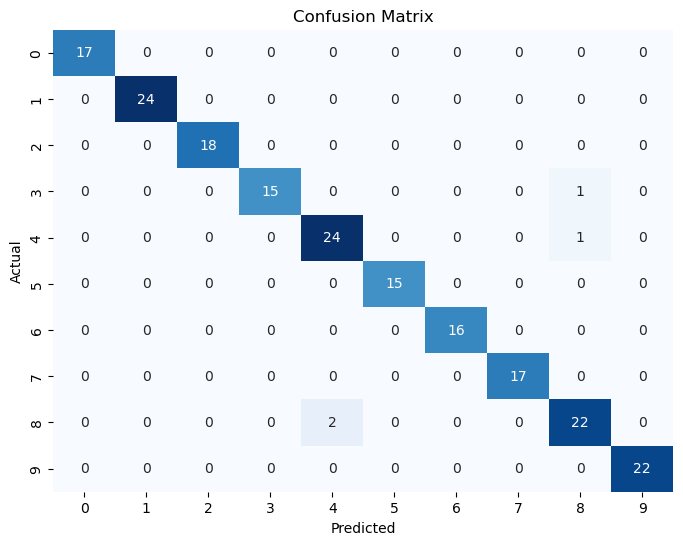

****************************************************************************************************
ML MODEL EVALUATION
****************************************************************************************************
sgd_classifier
Accuracy Score: 0.9845360824742269
Precision Score: 0.9858453844157683
Recall Score: 0.9845360824742269
F1 Score: 0.9846030119802291


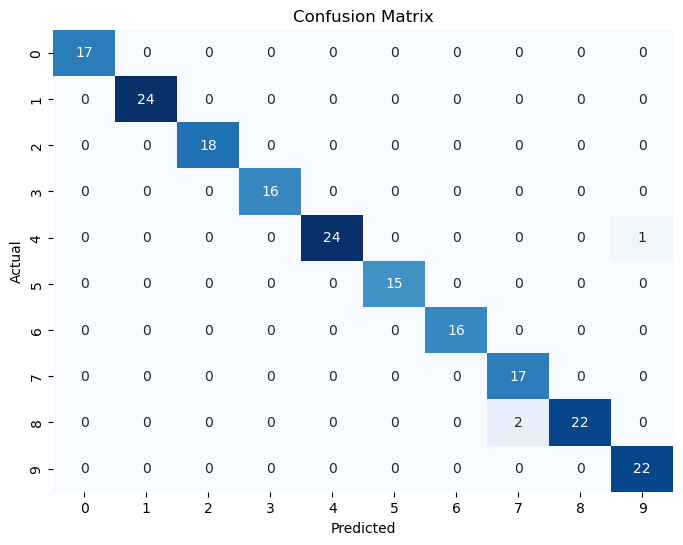

****************************************************************************************************
ML MODEL EVALUATION
****************************************************************************************************
decision_tree_classifier
Accuracy Score: 0.9845360824742269
Precision Score: 0.9848392965433597
Recall Score: 0.9845360824742269
F1 Score: 0.98456158470886


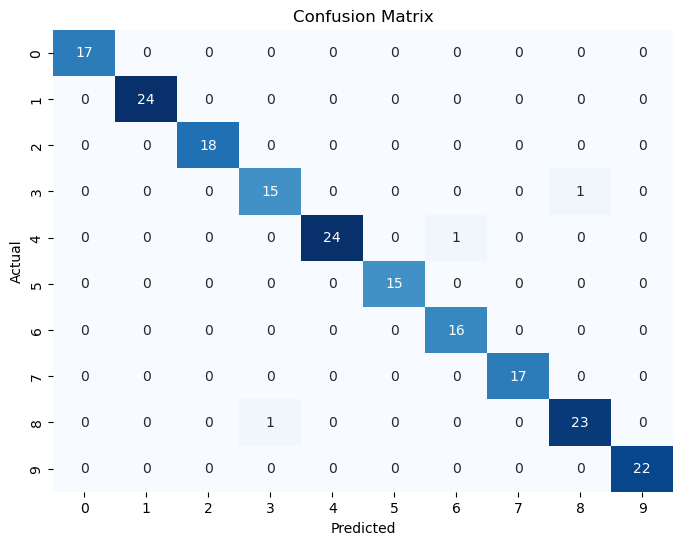

****************************************************************************************************
ML MODEL EVALUATION
****************************************************************************************************
knn_classifier
Accuracy Score: 0.979381443298969
Precision Score: 0.9822253821542838
Recall Score: 0.979381443298969
F1 Score: 0.9795464902880934


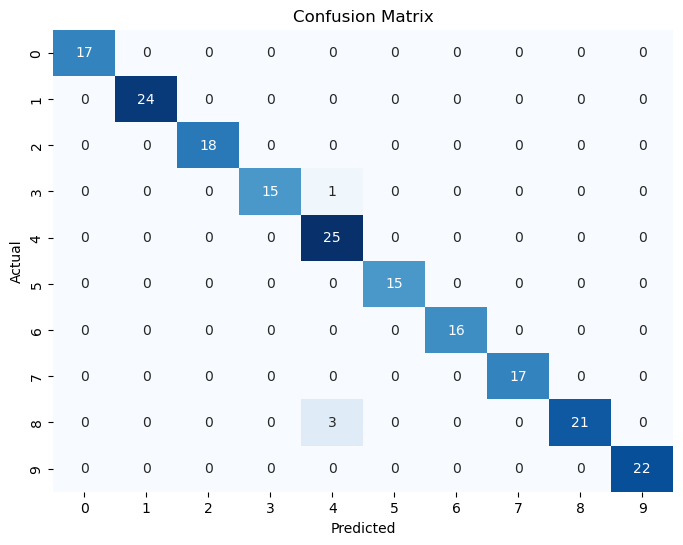

****************************************************************************************************
ML MODEL EVALUATION
****************************************************************************************************
svc
Accuracy Score: 0.979381443298969
Precision Score: 0.9804666304937601
Recall Score: 0.979381443298969
F1 Score: 0.9794248384492729


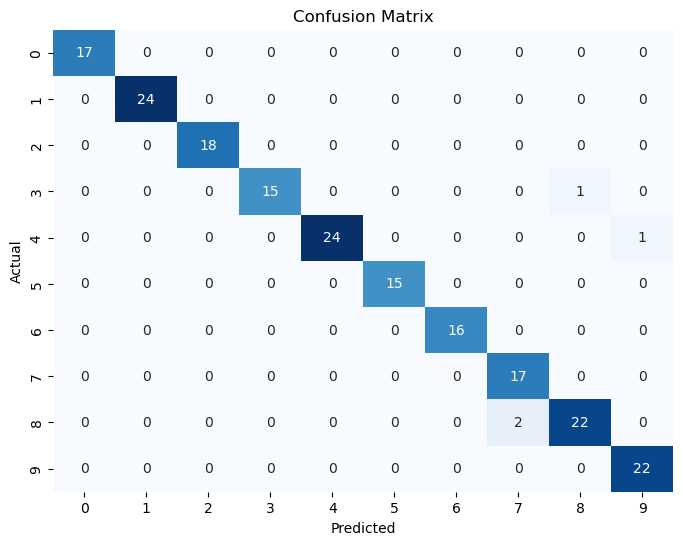

****************************************************************************************************
ML MODEL EVALUATION
****************************************************************************************************
random_forest_classifier
Accuracy Score: 0.9948453608247423
Precision Score: 0.9951485748938751
Recall Score: 0.9948453608247423
F1 Score: 0.9948708630593756


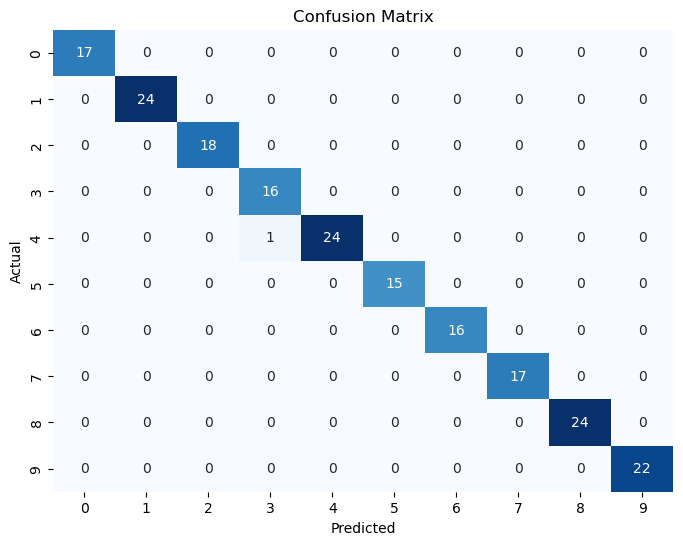

****************************************************************************************************


In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,ConfusionMatrixDisplay,confusion_matrix,roc_auc_score
import seaborn as sns
for name, model in best_models_classification.items():
    print("ML MODEL EVALUATION")
    print("*"*100)
    print( name)
    y_test_pred = model.predict(X_test)
    print("Accuracy Score:", accuracy_score(y_test, y_test_pred))
    print("Precision Score:", precision_score(y_test, y_test_pred,average="weighted"))
    print("Recall Score:", recall_score(y_test, y_test_pred,average="weighted"))
    print("F1 Score:", f1_score(y_test, y_test_pred,average="weighted"))
    # Assuming y_pred and y_test are defined
    cm = confusion_matrix(y_test, y_test_pred)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    print("*"*100)

In [31]:
import pickle

In [26]:
for algorithm, model in best_models_classification.items():
    model_filename = f"best_model{algorithm}.pkl"
    with open(model_filename, 'wb') as file:
        pickle.dump(model, file)
    print(f"Model saved as {model_filename}")

Model saved as best_modellogistic_regression.pkl
Model saved as best_modelsgd_classifier.pkl
Model saved as best_modeldecision_tree_classifier.pkl
Model saved as best_modelknn_classifier.pkl
Model saved as best_modelsvc.pkl
Model saved as best_modelrandom_forest_classifier.pkl


In [33]:
import pickle
mod = pickle.load(open("best_modelrandom_forest_classifier.pkl","rb"))

In [61]:
mod.predict([features.iloc[100].values[:len(list(features.iloc[100].values))-1]])

array(['Boxer'], dtype=object)

In [57]:
list(features.iloc[0].values)[:len(list(features.iloc[0].values))-1]

[0.0,
 0.0,
 0.0,
 0.0,
 0.2749002,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 11.3389635,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 3.0818274,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 6.8427467,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.22391842,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 45.132027,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.67339146,
 0.2678324,
 0.0,
 0.0,
 0.0,
 0.3551917,
 0.0,
 0.0,
 0.0,
 0.0,
 10.892247,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 18.986195,
 10.79791,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 2.0975091,
 0.0,
 0.49097803,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 4.458772,
 16.239883,
 0.0,
 0.0,
 0.0,
 0.0,
 3.2872224,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 12.664533,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1

In [69]:
features['label'].value_counts()

Beagle                100
Boxer                 100
Bulldog               100
Poodle                100
Yorkshire_Terrier     100
Dachshund              96
German_Shepherd        96
Labrador_Retriever     95
Golden_Retriever       91
Rottweiler             89
Name: label, dtype: int64